# Laboratorium #2: Smog

Dane o pomiarach pyłków PM10 i PM2.5
Ocenić i przygotować dane
Znaleźć obowiązujące normy dla zanieczyszczeń PM10 i PM2.5
Ocenić i zwizualizować ew. problemy
Przygotowanie danych  w dowolnej technologii
Wizualizacje w dowolnej technologii


## Import danych

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv("smog_output.csv")

In [55]:
print(df.head())

       Data  Godzina Parametr  Wartosc    SzerGeo    DlugGeo       Miasto  \
0  2/9/2019        0     PM10  27.8500  52.793122  18.241044   Inowrocław   
1  2/9/2019        0     PM10  24.7769  50.972167  14.941319   Działoszyn   
2  2/9/2019        0     PM10   7.9492  50.732817  16.648050  Dzierżoniów   
3  2/9/2019        0     PM10   8.6594  50.433493  16.653660      Kłodzko   
4  2/9/2019        0     PM10  16.6597  50.942073  17.291333        Oława   

           Powiat         Wojewodztwo  
0   inowrocławski  KUJAWSKO-POMORSKIE  
1     zgorzelecki        DOLNOŚLĄSKIE  
2  dzierżoniowski        DOLNOŚLĄSKIE  
3         kłodzki        DOLNOŚLĄSKIE  
4         oławski        DOLNOŚLĄSKIE  


## Czyszczenie danych

In [56]:
# konwersja do float
df['Wartosc'] = df['Wartosc'].astype(str).str.replace(',', '.').astype(float)

In [57]:
# unikalne parametry
print(df['Parametr'].unique())

['PM10' 'PM2.5' 'PS25' 'PR10']


In [58]:
print("Nulle w kolumnach:\n", df.isnull().sum())

Nulle w kolumnach:
 Data             0
Godzina          0
Parametr         0
Wartosc        365
SzerGeo          0
DlugGeo          0
Miasto           0
Powiat           0
Wojewodztwo      0
dtype: int64


In [59]:
# zamieniamy na średnią
srednia = df["Wartosc"].mean()
df["Wartosc"] = df["Wartosc"].fillna(srednia)

In [60]:
print("Nulle w kolumnach:\n", df.isnull().sum())

Nulle w kolumnach:
 Data           0
Godzina        0
Parametr       0
Wartosc        0
SzerGeo        0
DlugGeo        0
Miasto         0
Powiat         0
Wojewodztwo    0
dtype: int64


/tmp/ipykernel_55497/3684810374.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Parametr", y="Wartosc", palette="pastel")


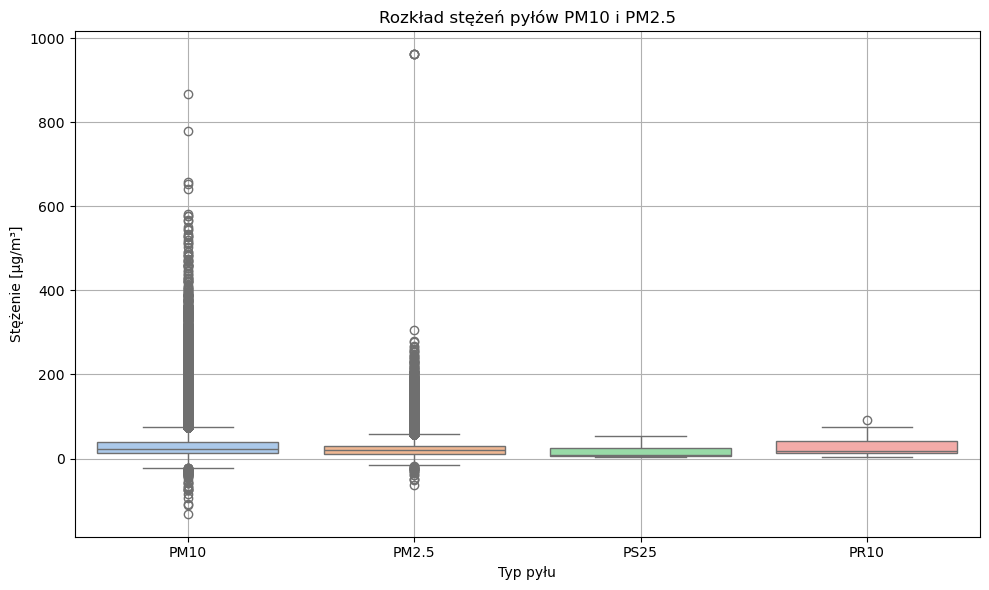

In [61]:
# sprawdzamy outliery

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Parametr", y="Wartosc", palette="pastel")
plt.title("Rozkład stężeń pyłów PM10 i PM2.5")
plt.xlabel("Typ pyłu")
plt.ylabel("Stężenie [µg/m³]")
plt.grid(True)
plt.tight_layout()
plt.show()

In [62]:
# usuwamy outliery
# metoda IQR
Q1 = df['Wartosc'].quantile(0.25)
Q3 = df['Wartosc'].quantile(0.75)
IQR = Q3 - Q1

df_clean = df[(df['Wartosc'] >= Q1 - 1.5 * IQR) & (df['Wartosc'] <= Q3 + 1.5 * IQR)]


/tmp/ipykernel_55497/1182750770.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="Parametr", y="Wartosc", palette="pastel")


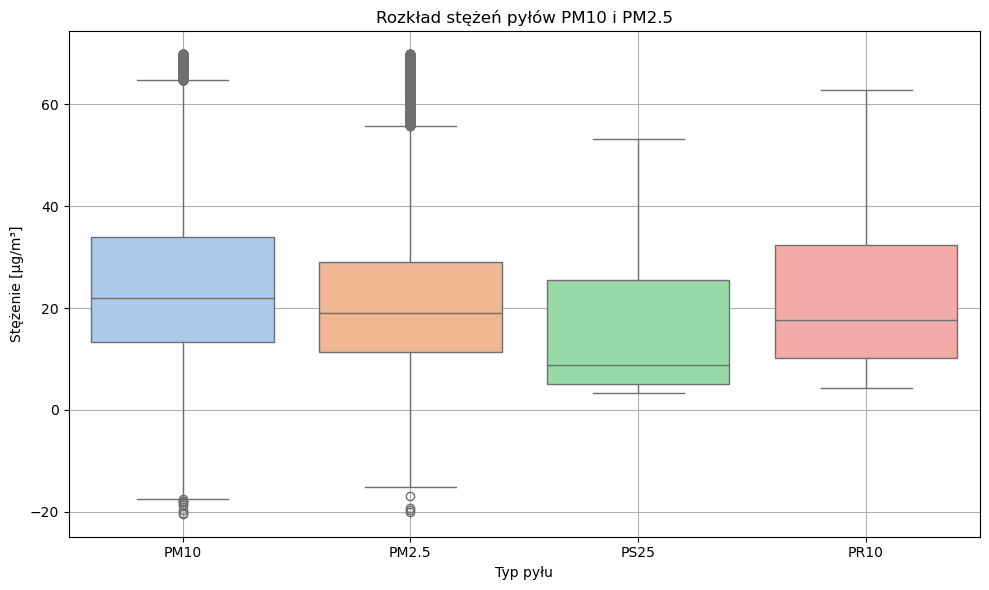

In [63]:
# sprawdzamy outliery jeszcze raz

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x="Parametr", y="Wartosc", palette="pastel")
plt.title("Rozkład stężeń pyłów PM10 i PM2.5")
plt.xlabel("Typ pyłu")
plt.ylabel("Stężenie [µg/m³]")
plt.grid(True)
plt.tight_layout()
plt.show()

## Znalezienie norm jakości powietrza

Zgodnie z normami UE i WHO:

- PM10 (dobowa): max 50 µg/m³
- nPM2.5 (dobowa): max 25 µg/m³ (WHO nawet niżej)

## Wizualizacja dla średniej dziennej wartości (średnia dobowa)

In [66]:
#średnia dzienna
df_mean = df_clean.groupby(['Data', 'Parametr'])['Wartosc'].mean().reset_index()

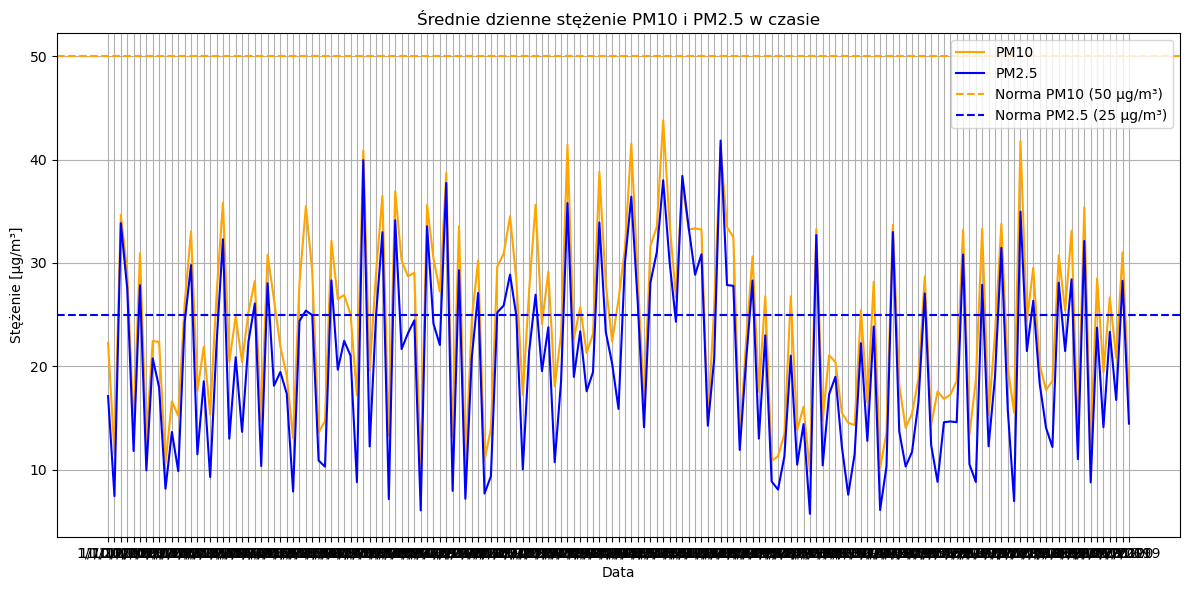

In [68]:
plt.figure(figsize=(12, 6))

# Filtrowanie PM10 i PM2.5
pm10 = df_mean[df_mean['Parametr'] == 'PM10']
pm25 = df_mean[df_mean['Parametr'] == 'PM2.5']

# Rysowanie linii
plt.plot(pm10['Data'], pm10['Wartosc'], label='PM10', color='orange')
plt.plot(pm25['Data'], pm25['Wartosc'], label='PM2.5', color='blue')

# Linie graniczne
plt.axhline(50, color='orange', linestyle='--', label='Norma PM10 (50 µg/m³)')
plt.axhline(25, color='blue', linestyle='--', label='Norma PM2.5 (25 µg/m³)')

# Opis osi i tytuł
plt.title('Średnie dzienne stężenie PM10 i PM2.5 w czasie')
plt.xlabel('Data')
plt.ylabel('Stężenie [µg/m³]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
